<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab05_Part2_SHM_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 2: Modeling Simple Harmonic Motion with the Euler Method
*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

In [2]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

## Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $dx$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [3]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k, m, dx):
  """
  Calculates the acceleration of a mass on the end of a spring according to Hooke's law.

  INPUT:
  k - spring constant
  m - mass
  dx - displacement from equilibrium

  RETURN:
  a - acceleration
  """
  a = -(k * dx) / m

  return a



## Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [4]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0, v0, tmax, dt):
  """
  Creates arrays of zeros for time, position and velocity that are nsteps long. Sets the initial values for position and velocity.

  INPUT:
  x0 - initial position
  v0 - initial velocity
  tmax - total time
  dt - time steps

  RETURN:
  time - zero array for time
  pos - zero array for position
  vel - zero array for velocity
  """

  nsteps = int(tmax/dt)

  time = np.zeros(nsteps)
  pos = np.zeros(nsteps)
  vel = np.zeros(nsteps)

  pos[0] = x0
  vel[0] = v0

  return time, pos, vel


## Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* Optional input argument
  * equilibrium position, $xeq$.  
  * Set the default value to zero.

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [5]:
# write your calculate function here
def calculate(time, pos, vel, k, m, dt, xeq=0):
  """
  Calculates the position and velocity as a function of time using the Euler Method.

  INPUT:
  time - zero array for time
  pos - zero array for position
  vel - zero array for velocity
  k - spring constant
  m - mass
  dt - time steps
  dx - displacement from equilibrium

  RETURN:
  time - zero array for time
  pos - zero array for position
  vel - zero array for velocity
  """

  for i in range(1, len(pos)):
    vel[i] = vel[i-1] + (acceleration(k, m, (xeq-pos[i-1])) * dt)
    pos[i] = pos[i-1] + (vel[i-1] * dt)
    time[i] = time[i-1] + dt


  return time, pos, vel


## Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


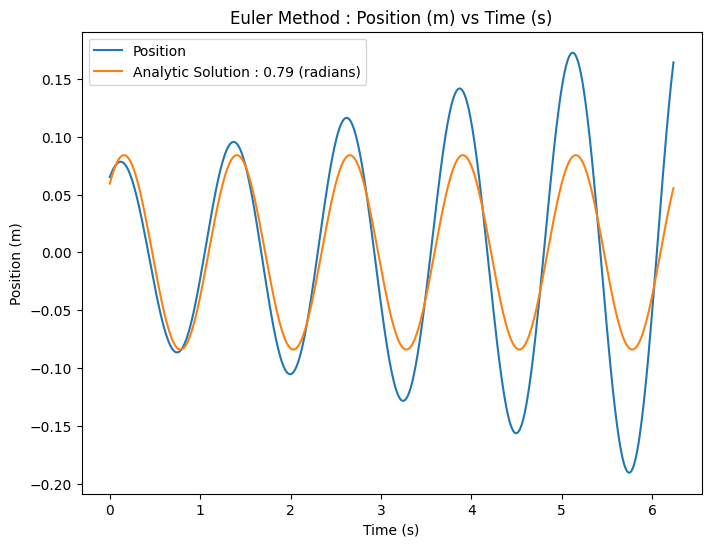

In [42]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.065
vx0 = 0.207

# set the amplitude, mass and spring constant to the values from Part 1
A = 0.084
m = .1
k = -2.53

# Enter the period you determined from Part 1
T = 1.25
# set the time step to a small fraction of the period
dt = T/100

# set tmax to 5x the period
tmax = 5 * T


# call initialize
time, pos, vel = initialize(x0, vx0, tmax, dt)


# call calculate
time, pos, vel = calculate(time, pos, vel, k, m, dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(time,pos, label='Position')



# overplot your analytic solution from Part 1
omega = (2 * np.pi) / T
phi = np.pi/4

def calc_SHO(A,omega,phi,t):
  x_t = A * np.cos(omega * t - phi)
  return x_t

plt.plot(time,calc_SHO(A,omega,phi,time), label=f'Analytic Solution : {phi:.2f} (radians)')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Euler Method : Position (m) vs Time (s)')

plt.legend()

# Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions in your wiki summary.
1. Does your Euler solution conserve energy?  
1. Is the Euler method a good approach for modeling oscillatory motion?

In [43]:
# Your plot of energy vs time here
E = 0.5 * (m * vel**2) + 0.5 * (k * pos**2)

Text(0.5, 1.0, 'Total Energy (J) over Time (s)')

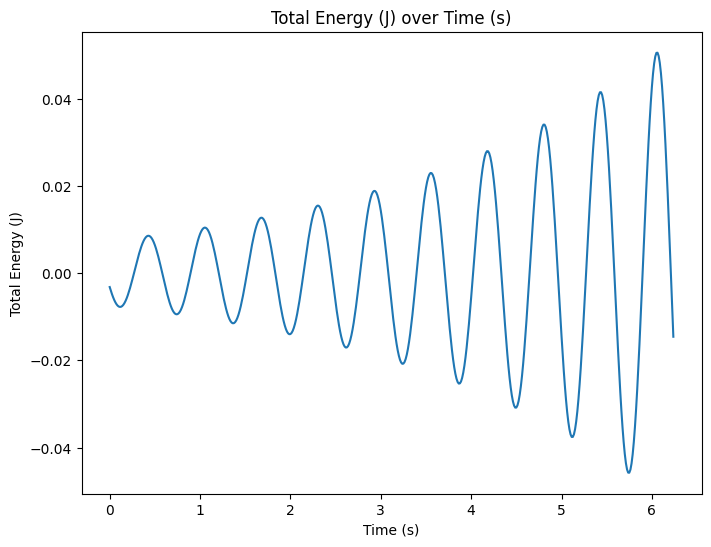

In [44]:
plt.figure(figsize=(8,6))
plt.plot(time, E)
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (J)')
plt.title('Total Energy (J) over Time (s)')

# Euler-Cromer Solution

* Copy your calculate function below, but call it `euler_cromer_calculate`
* Adjust the code so that the $\omega_{i+1}$ is used to calculate $\theta_{i+1}$.
* Replot the position vs time.
* Replot total energy vs time.


**Questions**

Briefly answer the following questions in your wiki summary.
1. What is different about the Euler vs Euler-Cromer method?
1. Does the Euler-Cromer solution conserve energy?

In [33]:
# your euler_cromer_calculate

def euler_cromer_calculate(time, pos, vel, k, m, dt, xeq=0):
  """
  Calculates the position and velocity as a function of time using the Euler-Cromer Method.

  INPUT:
  time - zero array for time
  pos - zero array for position
  vel - zero array for velocity
  k - spring constant
  m - mass
  dt - time steps
  dx - displacement from equilibrium

  RETURN:
  time - zero array for time
  pos - zero array for position
  vel - zero array for velocity
  """

  for i in range(0, len(pos)):
    vel[i] = vel[i-1] + (acceleration(k, m, (xeq-pos[i-1])) * dt)
    pos[i] = pos[i-1] + (vel[i] * dt)
    time[i] = time[i-1] + dt

  return time, pos, vel

In [36]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate
etime, epos, evel = euler_cromer_calculate(time, pos, vel, k, m, dt, xeq=0)


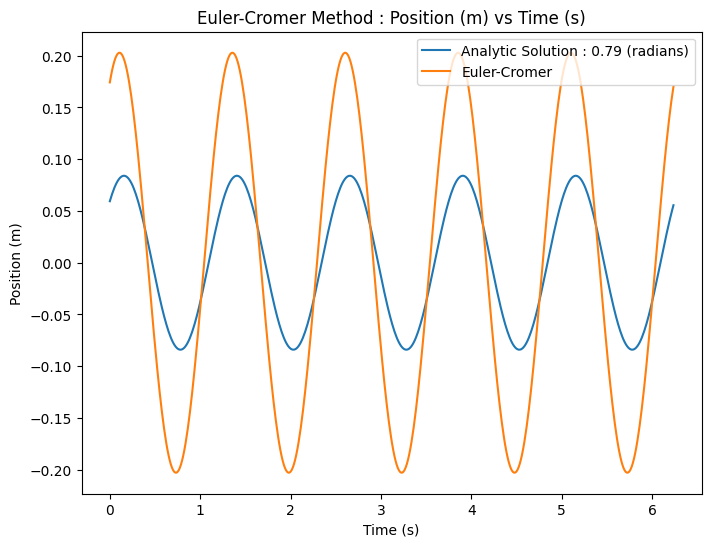

In [49]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here
plt.figure(figsize=(8,6))
plt.plot(time,calc_SHO(A,omega,phi,time), label=f'Analytic Solution : {phi:.2f} (radians)')
plt.plot(time,epos, label='Euler-Cromer')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Euler-Cromer Method : Position (m) vs Time (s)')


plt.legend()